## Practical Work 2
## Mohamed Ali Farag

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
a, b = -2, 1
x_input = np.linspace(0,20)
y_output = a*x_input + b 

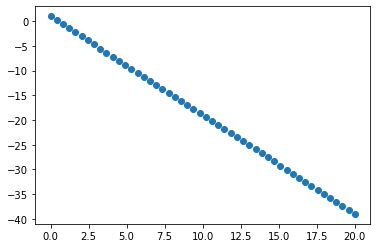

In [3]:
plt.scatter(x_input, y_output)
plt.show()

In [4]:
x_input

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
y_output

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [6]:
def gradient_descent(x_input_fun, y_output_fun, learing_rate, max_iter):
    m = len(x_input_fun)
    theta_0, theta_1, cost = 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        theta_0 = theta_0 - alpha * gradients[0]
        theta_1 = theta_1 - alpha * gradients[1]
        
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, hypothesis, costs

#### Try your function with any input parameterss of your choice.

In [7]:
iteration = 50
alpha = 0.001
thetas_0, thetas_1, y_predicated, costs = gradient_descent(x_input, y_output, alpha, iteration)

In [8]:
y_predicated

array([ -0.12808066,  -0.90952912,  -1.69097759,  -2.47242605,
        -3.25387452,  -4.03532298,  -4.81677144,  -5.59821991,
        -6.37966837,  -7.16111684,  -7.9425653 ,  -8.72401377,
        -9.50546223, -10.28691069, -11.06835916, -11.84980762,
       -12.63125609, -13.41270455, -14.19415302, -14.97560148,
       -15.75704994, -16.53849841, -17.31994687, -18.10139534,
       -18.8828438 , -19.66429227, -20.44574073, -21.22718919,
       -22.00863766, -22.79008612, -23.57153459, -24.35298305,
       -25.13443152, -25.91587998, -26.69732844, -27.47877691,
       -28.26022537, -29.04167384, -29.8231223 , -30.60457076,
       -31.38601923, -32.16746769, -32.94891616, -33.73036462,
       -34.51181309, -35.29326155, -36.07471001, -36.85615848,
       -37.63760694, -38.41905541])

#### Calculate r2 score

In [9]:
r2_score(y_output, y_predicated)

0.9976352360258535

#### Plot loss vs. epochs

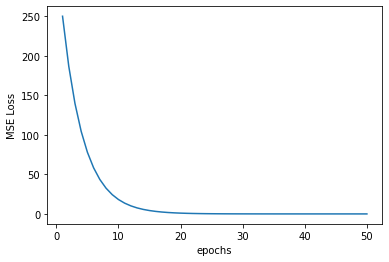

In [10]:
plt.plot(np.linspace(1, iteration,num=iteration),costs)
plt.xlabel("epochs")
plt.ylabel("MSE Loss")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

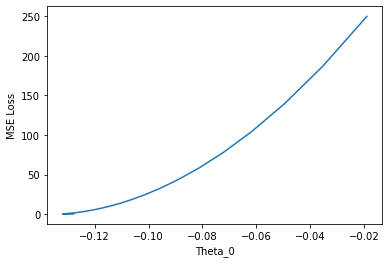

In [11]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

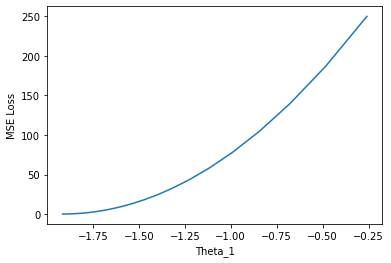

In [12]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

#### Plot all regression lines till converge

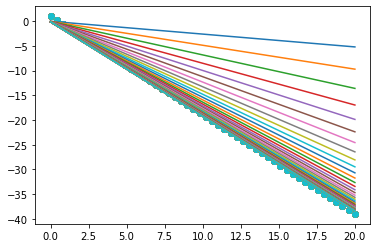

In [13]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

#### Plot the best regression line

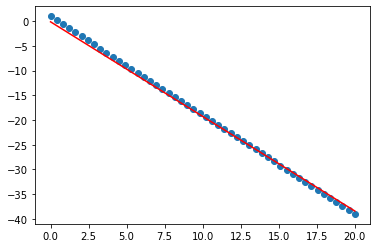

In [14]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [15]:
iteration = 50
alpha = 0.01
thetas_0, thetas_1, y_predicated, costs = gradient_descent(x_input, y_output, alpha, iteration)

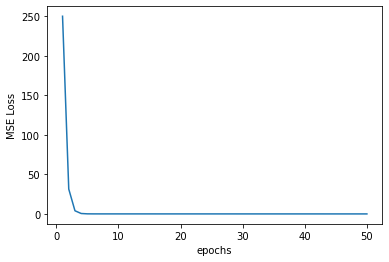

In [16]:
plt.plot(np.linspace(1, iteration,num=iteration),costs)
plt.xlabel("epochs")
plt.ylabel("MSE Loss")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

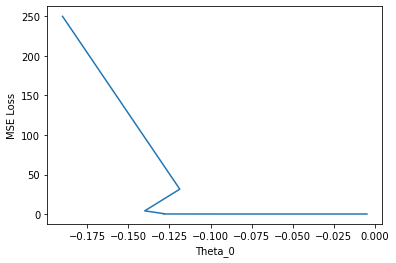

In [17]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

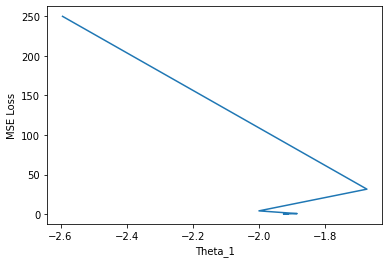

In [18]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

#### Plot all regression lines till converge

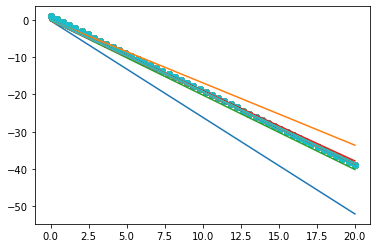

In [19]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

#### Plot the best regression line

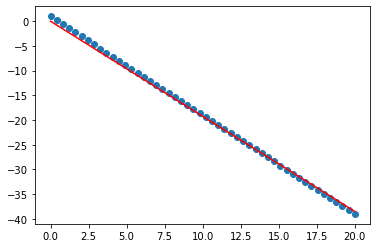

In [20]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

In [21]:
iteration = 50
alpha = 0.1
thetas_0, thetas_1, y_predicated, costs = gradient_descent(x_input, y_output, alpha, iteration)

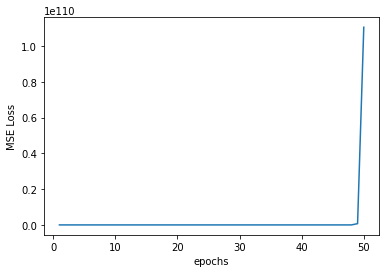

In [22]:
plt.plot(np.linspace(1, iteration,num=iteration),costs)
plt.xlabel("epochs")
plt.ylabel("MSE Loss")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

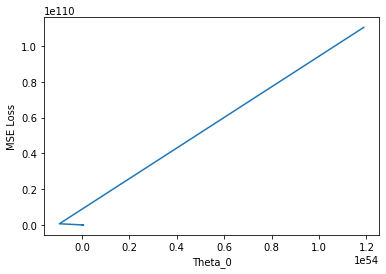

In [23]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

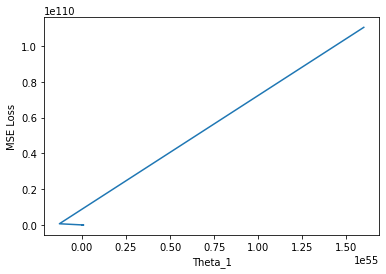

In [24]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

#### Plot all regression lines till converge

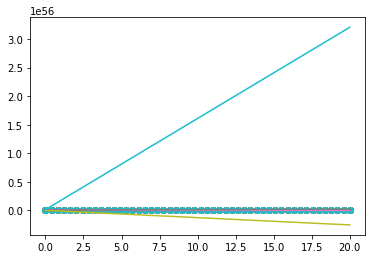

In [25]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

#### Plot the best regression line

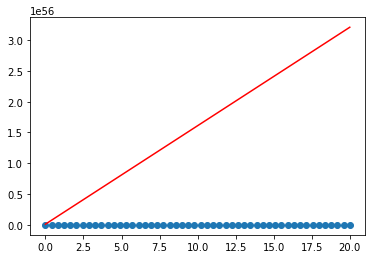

In [26]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [27]:
def mini_batch_gd(x_input_fun, y_output_fun, learing_rate, max_iter, batch_size):
    m = batch_size
    theta_0, theta_1, cost = 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    mini_iter = max_iter // batch_size
    #can implement x_batch and y_batch using list comprehension
    
    for j in range(max_iter):
        for i in range(mini_iter):
            tmp = i*batch_size
            hypothesis = theta_0 + theta_1 * x_input_fun[tmp:tmp+batch_size]
            cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun[tmp:tmp+batch_size])) ** 2)
            gradients = [(1/m) * np.sum(hypothesis - y_output_fun[tmp:tmp+batch_size]), (1/m) * np.sum(x_input_fun[tmp:tmp+batch_size].dot(hypothesis - y_output_fun[tmp:tmp+batch_size]))]
            theta_0 = theta_0 - alpha * gradients[0]
            theta_1 = theta_1 - alpha * gradients[1]
            all_theta_0.append(theta_0)
            all_theta_1.append(theta_1)
            costs.append(cost)
            
    return all_theta_0, all_theta_1, costs

#### Try your function with any input parameterss of your choice.

In [28]:
iteration = 50
alpha = 0.0001
batch_size = 10
thetas_0, thetas_1, costs = mini_batch_gd(x_input, y_output, alpha, iteration, batch_size)

In [29]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([ -0.13117327,  -0.88791127,  -1.64464927,  -2.40138728,
        -3.15812528,  -3.91486329,  -4.67160129,  -5.42833929,
        -6.1850773 ,  -6.9418153 ,  -7.69855331,  -8.45529131,
        -9.21202931,  -9.96876732, -10.72550532, -11.48224333,
       -12.23898133, -12.99571933, -13.75245734, -14.50919534,
       -15.26593334, -16.02267135, -16.77940935, -17.53614736,
       -18.29288536, -19.04962336, -19.80636137, -20.56309937,
       -21.31983738, -22.07657538, -22.83331338, -23.59005139,
       -24.34678939, -25.1035274 , -25.8602654 , -26.6170034 ,
       -27.37374141, -28.13047941, -28.88721741, -29.64395542,
       -30.40069342, -31.15743143, -31.91416943, -32.67090743,
       -33.42764544, -34.18438344, -34.94112145, -35.69785945,
       -36.45459745, -37.21133546])

#### Calculate r2 score

In [30]:
r2_score(y_output, y_predicated)

0.9938928256485312

#### Plot loss vs. epochs

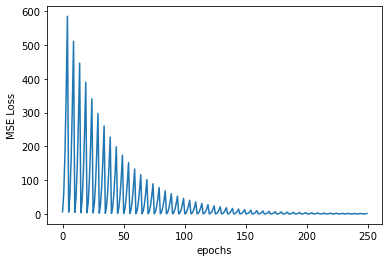

In [31]:
plt.plot(costs)
plt.xlabel("epochs")
plt.ylabel("MSE Loss")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

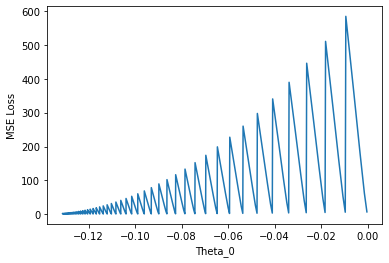

In [32]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

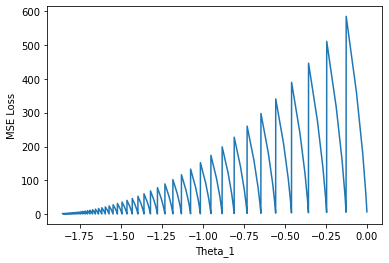

In [33]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

#### Plot all regression lines till converge

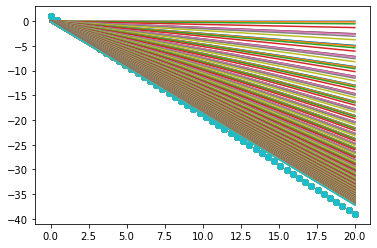

In [34]:
for i in range(iteration*(iteration // batch_size)):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

#### Plot the best regression line

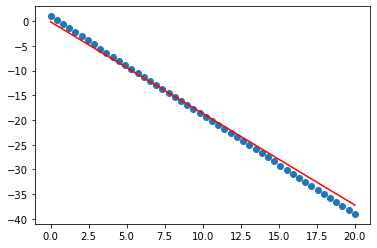

In [35]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_best, 'r')

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [36]:
def stochastic_gd(x_input_fun, y_output_fun, learing_rate, max_iter, batch_size):
    m = batch_size
    theta_0, theta_1, cost = 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    mini_iter = max_iter // batch_size
    
    for j in range(max_iter):
        for i in range(mini_iter):
            tmp = i*batch_size
            hypothesis = theta_0 + theta_1 * x_input_fun[tmp:tmp+batch_size]
            cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun[tmp:tmp+batch_size])) ** 2)
            gradients = [(1/m) * np.sum(hypothesis - y_output_fun[tmp:tmp+batch_size]), (1/m) * np.sum(x_input_fun[tmp:tmp+batch_size].dot(hypothesis - y_output_fun[tmp:tmp+batch_size]))]
            theta_0 = theta_0 - alpha * gradients[0]
            theta_1 = theta_1 - alpha * gradients[1]
            all_theta_0.append(theta_0)
            all_theta_1.append(theta_1)
            costs.append(cost)
            
    return all_theta_0, all_theta_1, costs

#### Try your function with any input parameterss of your choice.

In [37]:
iteration = 50
alpha = 0.0001
batch_size = 1
thetas_0, thetas_1, costs = stochastic_gd(x_input, y_output, alpha, iteration, batch_size)

In [38]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([ -0.08130226,  -0.86697923,  -1.65265619,  -2.43833315,
        -3.22401012,  -4.00968708,  -4.79536404,  -5.58104101,
        -6.36671797,  -7.15239493,  -7.9380719 ,  -8.72374886,
        -9.50942582, -10.29510279, -11.08077975, -11.86645671,
       -12.65213368, -13.43781064, -14.22348761, -15.00916457,
       -15.79484153, -16.5805185 , -17.36619546, -18.15187242,
       -18.93754939, -19.72322635, -20.50890331, -21.29458028,
       -22.08025724, -22.8659342 , -23.65161117, -24.43728813,
       -25.22296509, -26.00864206, -26.79431902, -27.57999598,
       -28.36567295, -29.15134991, -29.93702687, -30.72270384,
       -31.5083808 , -32.29405777, -33.07973473, -33.86541169,
       -34.65108866, -35.43676562, -36.22244258, -37.00811955,
       -37.79379651, -38.57947347])

#### Calculate r2 score

In [39]:
r2_score(y_output, y_predicated)

0.9978037526037133

#### Plot loss vs. epochs

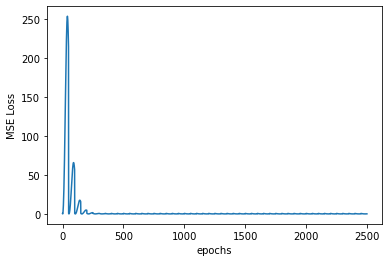

In [40]:
plt.plot(costs)
plt.xlabel("epochs")
plt.ylabel("MSE Loss")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

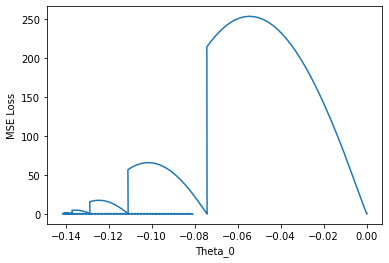

In [41]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

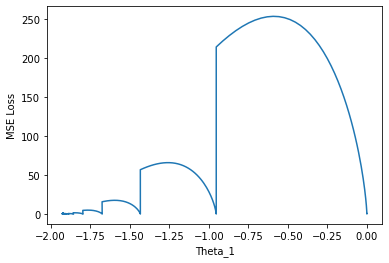

In [42]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

#### Plot all regression lines till converge

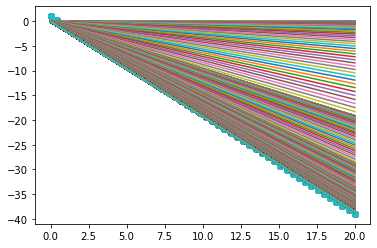

In [43]:
for i in range(iteration*(iteration // batch_size)):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

#### Plot the best regression line

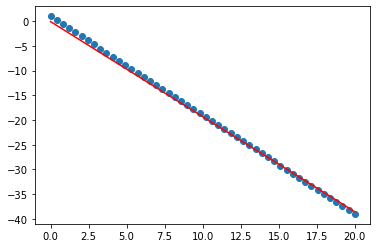

In [44]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_best, 'r')